<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/06_An%C3%A1lisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de bases de datos


---
Realizó: Diana Prado, Raziel Cedillo, Armando Rufino y Héctor Ortíz

Contacto: pradodiana93@gmail.com, brayanraziel1997@gmail.com

# Objetivos

* Introducir a la visualización y al análisis de datos químicos.
* Utilizar métodos visuales como histogramas, diagramas de caja y de violín para analizar propiedades fisicoquimicas de importancia farmacéutica y descriptores asociados con complejidad molecular.
* Identificar posibles correlaciones entre variables.

Los ejercios elaborados en este tutorial están enfocados en analizar y mostrar de una manera gráfica, por medio de representaciones visuales, propiedades fisicoquimicas y descriptores de importancia farmacéutica.
___

Para los siguientes ejercicios usaremos una base de datos descargada de [ChEMBL](https://www.ebi.ac.uk/chembl/) que contiene información sobre fármacos en fase 4 (aprobados y comercializados) con 1677 moléculas. La base de datos tiene columnas que nos informan el identificador (ID) de cada compuesto en ChEMBL, nombre, SMILES, tipo de molécula, fase clínica, si es de administración oral, parenteral o tópica, el año en que fue aprobado como fármaco y su indicación terapéutica.

Los descriptores que se calcularán son los siguientes :


>  1 - Coeficiente de partición (logP) <br>
   2 - Área de superficie polar topológica (TPSA) <br>
   3 - Masa molar (MW) <br>
   4 - Número de enlaces rotables (RotBonds) <br>
   5 - Número de donadores de puente de hidrógeno (HBD) <br>
   6 - Número de aceptores de puente de hidrógeno (HBA)<br>
   7 - Número de heteroátomos (HetAtoms)<br>
   8 - Número de anillos (NumRings)<br>
   9 - Fracción de átomos de carbono sp<sup>3</sup> (CSP3)  <br>


  En la primera parte de este tutorial, se graficarán diferentes tipos de representaciones visuales para obtener información visual sobre nuestras variables (en este caso, descriptores de importancia farmacéutica). Además, se analizarán las posibles correlaciones entre los distintos descriptores moleculares.


#Preparación del entorno
___

Instalación de librerías necesarias:

In [48]:
!pip install rdkit #Quimioinformática

Importamos las librerías y módulos necesarios:

In [49]:
#Manipulación de datos y gráficas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Quimioinformática
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) #Para visualizar moléculas

Accedemos a la base de datos:

Abriremos un [archivo .xlsx](https://github.com/DIFACQUIM/Cursos/raw/main/Datasets/chembl_fases_curada.xlsx) con la librería `pandas` y trabajaremos con el  *dataframe* nombrado "df":

In [50]:
#Cargar desde GitHub:
df=pd.read_excel("https://github.com/DIFACQUIM/Cursos/raw/main/Datasets/chembl_fases_curada.xlsx",  engine='openpyxl')

print(f"DataFrame shape: {df.shape}.")
df

DataFrame shape: (1677, 11).


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,NEW_SMILES
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4,True,False,True,1984,Smoking Cessation Adjunct,CN1CCCC1c1cccnc1
2,CHEMBL4,OFLOXACIN,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,Small molecule,4,True,True,True,1990,Antibacterial,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23
3,CHEMBL5,NALIDIXIC ACID,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,Small molecule,4,True,False,False,1964,Antibacterial,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
4,CHEMBL6,INDOMETHACIN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Small molecule,4,True,True,True,1965,Anti-Inflammatory,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...
1672,CHEMBL4594250,NETARSUDIL,Cc1ccc(C(=O)OCc2ccc([C@@H](CN)C(=O)Nc3ccc4cncc...,Small molecule,4,False,False,True,2017,NaN,Cc1ccc(C(=O)OCc2ccc(C(CN)C(=O)Nc3ccc4cnccc4c3)...
1673,CHEMBL4594261,FLUOROESTRADIOL F-18,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...,Small molecule,4,False,True,False,2020,NaN,CC12CCC3c4ccc(O)cc4CCC3C1CC([18F])C2O
1674,CHEMBL4594271,BEROTRALSTAT,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...,Small molecule,4,True,False,False,2020,NaN,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...
1675,CHEMBL4596392,DEUCRAVACITINIB,CNC(=O)c1nnc(NC(=O)C2CC2)cc1Nc1cccc(-c2ncn(C)n...,Small molecule,4,True,False,False,2022,NaN,CNC(=O)c1n[nH]c(=NC(=O)C2CC2)cc1Nc1cccc(-c2ncn...


In [51]:
#Información sobre el DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  1677 non-null   object
 1   pref_name           1677 non-null   object
 2   canonical_smiles    1677 non-null   object
 3   molecule_type       1677 non-null   object
 4   max_phase           1677 non-null   int64 
 5   oral                1677 non-null   bool  
 6   parenteral          1677 non-null   bool  
 7   topical             1677 non-null   bool  
 8   first_approval      1677 non-null   int64 
 9   indication_class    1067 non-null   object
 10  NEW_SMILES          1677 non-null   object
dtypes: bool(3), int64(2), object(6)
memory usage: 109.9+ KB


In [52]:
#Estadística básica sobre los datos:
df.describe()

,max_phase,first_approval
count,1677.0,1677.000000
mean,4.0,1989.421586
std,0.0,20.756040
min,4.0,1939.000000
25%,4.0,1976.000000
50%,4.0,1991.000000
75%,4.0,2007.000000
max,4.0,2022.000000


# Gráficos de una variable
---

## Cálculo de descriptores

Calcularemos distintas propiedades fisicoquímicas con `RDKit`:

[04:38:36] WARNING: not removing hydrogen atom without neighbors
[04:38:36] WARNING: not removing hydrogen atom without neighbors
[04:38:36] WARNING: not removing hydrogen atom without neighbors
[04:38:36] WARNING: not removing hydrogen atom without neighbors


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,NEW_SMILES,ROMol
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4,True,False,True,1984,Smoking Cessation Adjunct,CN1CCCC1c1cccnc1,

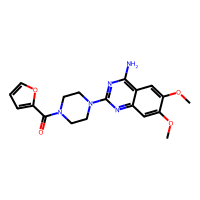
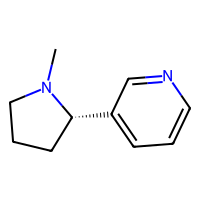

In [53]:
#Nueva columna de objeto tipo Mol
PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles")
df[0:2]

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,NEW_SMILES,ROMol,MW
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,,383.159354
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4,True,False,True,1984,Smoking Cessation Adjunct,CN1CCCC1c1cccnc1,,162.115698

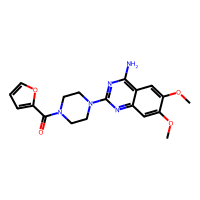
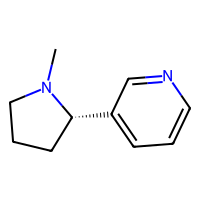

In [54]:
#Cálculo de la masa molar exacta
df["MW"] = df["ROMol"].apply(Descriptors.ExactMolWt)
df[0:2]

In [55]:
#Cálculo del resto de los descriptores a analizar
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA)
df["CSP3"] = df["ROMol"].apply(Descriptors.FractionCSP3)
df["NumRings"] = df["ROMol"].apply(Descriptors.RingCount)
df["HetAtoms"] = df["ROMol"].apply(Descriptors.NumHeteroatoms)
df["RotBonds"] = df["ROMol"].apply(Descriptors.NumRotatableBonds)
#Visualizar columnas seleccionadas
df[['MW', 'logP', 'TPSA', 'HBA']]

,MW,logP,TPSA,HBA
0,383.159354,1.78460,106.95,8
1,162.115698,1.84830,16.13,2
2,361.143784,1.54400,75.01,6
3,232.084792,1.42302,72.19,4
4,357.076786,3.92732,68.53,4
...,...,...,...,...
1672,453.205242,4.88964,94.31,5
1673,289.170743,3.55720,40.46,2
1674,562.210422,5.70188,108.76,6
1675,422.181487,1.73240,135.95,9


Más información sobre los descriptores que pueden calcularse con `RDKit`: <br>
https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html <br>
https://rdkit.org/docs/source/rdkit.Chem.Lipinski.html

##Histogramas

Un histograma es una representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos por intervalos y la frecuencia de estos intervalos en un rango.
Haciendo uso del método .hist de Matplotlib, se observa el histograma del número de enlaces rotables de los fármacos de administración parenteral.

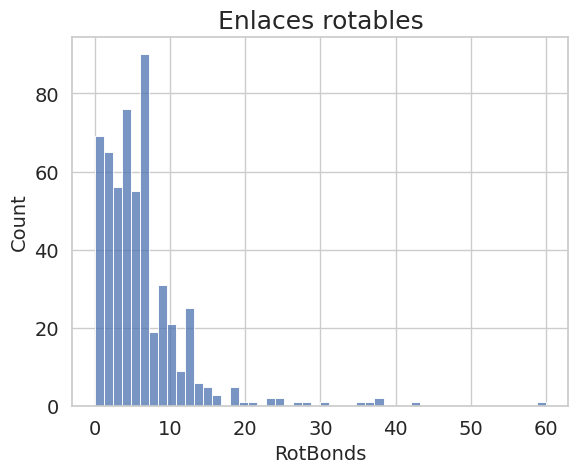

In [56]:
#Guardar un nuevo dataframe sólo con los fármacos parenterales
df_parenteral = df[df['parenteral']== 1]
#Graficar el histograma con Seaborn
hist=sns.histplot(x="RotBonds", data = df_parenteral)
#Título, títulos de ejes, y tamaño de letra
hist.axes.set_title("Enlaces rotables",fontsize=18)
hist.set_xlabel("RotBonds",fontsize=14)
hist.set_ylabel("Count",fontsize=14)
hist.tick_params(labelsize=14)

También es posible analizar todas las variables en un mismo gráfico. En este caso se muestra la distribución de los valores para los diferentes descriptores de la base de compuestos de administración parenteral.

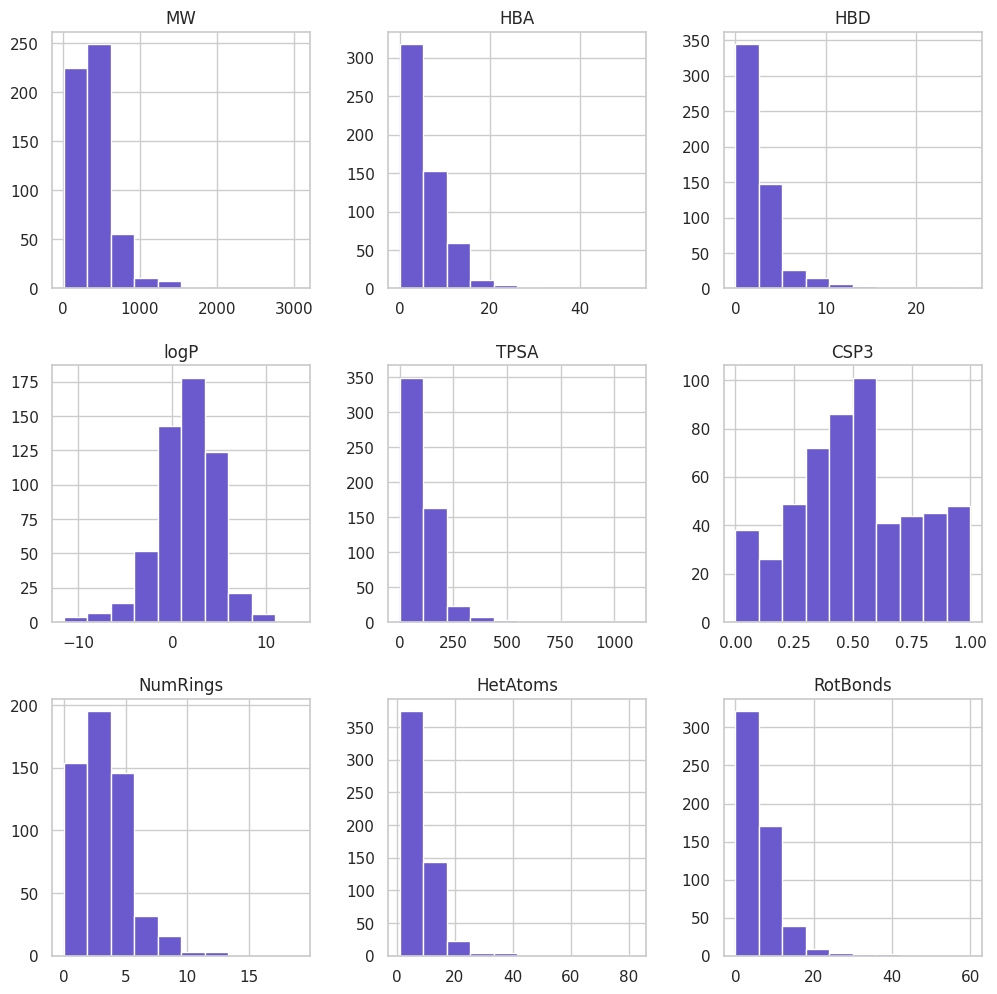

In [57]:
#Seleccionar los descriptores a graficar
df_parenteral_descriptors= df_parenteral[['MW', 'HBA', 'HBD', 'logP', 'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds']]
#Histograma
df_parenteral_descriptors.hist(figsize=(12,12), color="slateblue")
plt.show()

##Gráficos de caja

Un *boxplot* o gráfico de caja, es un grafico unidimensional sencillo que muestra todos los valores de una variable de la base de datos.
Los *boxplot* nos muestran la distribución de los datos, con ayuda de la caja y de la mediana es posible observar si esta es simétrica, sesgada a la derecha o a la izquierda. También nos permite identificar valores atípicos u *outliers* y poder comparar distribuciones (ver **Figura 1**).




**Figura 1.** Diferentes elementos que componen un *boxplot*
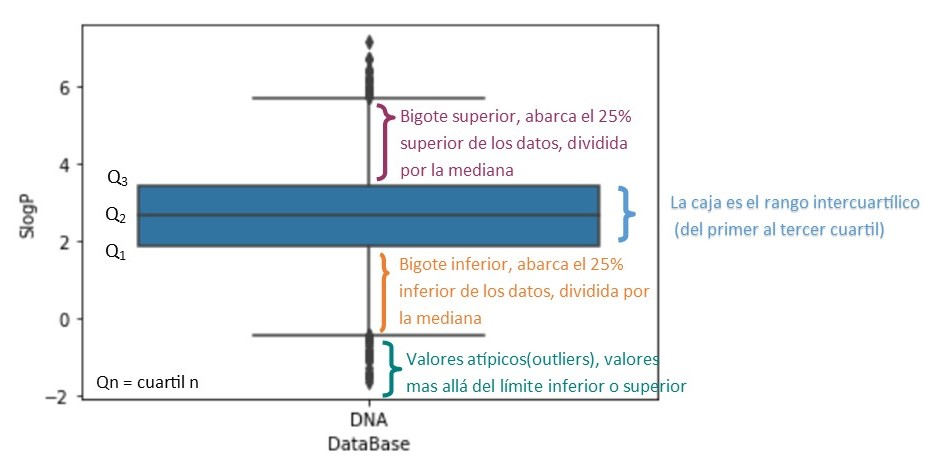

Se puede generar la representacion grafica de un *boxplot* a partir de la paquetería `Seaborn`, que ya fue instalada previamente.

Para graficar los datos de acuerdo con su vía de administración se creará una nueva columna nombrada como "Via_admon":

In [58]:
#Condiciones para asignar la vía de administración a cada compuesto
conditions = [
    (df['oral'] == 1),
    (df['parenteral'] == 1),
    (df['topical'] == 1),
    (df['oral'] == 0) & (df['parenteral'] == 0) & (df['topical'] == 0)]
#Nombre que se asignará al compuesto de acuerdo con su vía de administración
values = ['Oral', 'Parenteral', 'Topical', 'Other']
#Crear nueva columna y visualizar dataframe
df['Via_admon'] = np.select(conditions, values)
df[53:59]

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,...,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,Via_admon
53,CHEMBL434,ISOPROTERENOL,CC(C)NCC(O)c1ccc(O)c(O)c1,Small molecule,4,False,True,True,1956,Bronchodilator,...,211.120843,4,4,1.12920,72.72,0.454545,1,4,4,Parenteral
54,CHEMBL435,HYDROCHLOROTHIAZIDE,NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O,Small molecule,4,True,False,False,1959,Diuretic,...,296.964475,5,3,-0.35130,118.36,0.142857,2,10,1,Oral
55,CHEMBL35,FUROSEMIDE,NS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,Small molecule,4,True,True,False,1966,Diuretic,...,330.007720,5,3,1.89070,122.63,0.083333,2,9,5,Oral
56,CHEMBL36,PYRIMETHAMINE,CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1,Small molecule,4,True,False,False,1953,Antimalarial,...,248.082874,4,2,2.52380,77.82,0.166667,2,5,2,Oral
57,CHEMBL437,SULFATHIAZOLE,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,Small molecule,4,False,False,True,1945,Antibacterial,...,255.013619,5,2,1.52610,85.08,0.000000,2,7,3,Topical
58,CHEMBL438,SULFAMERAZINE,Cc1ccnc(NS(=O)(=O)c2ccc(N)cc2)n1,Small molecule,4,True,False,False,1982,Antibacterial,...,264.068097,5,2,1.16802,97.97,0.090909,2,7,3,Oral


Text(0, 0.5, 'Masa molar')

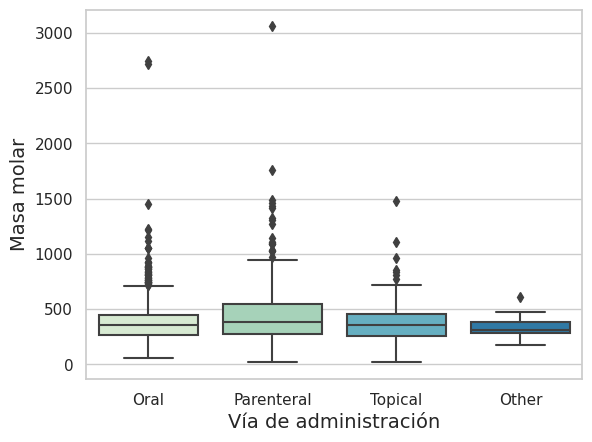

In [59]:
#Graficar boxplot de la masa molar de cada vía de administración
ax = sns.boxplot(x="Via_admon", y="MW", data=df, palette="GnBu")
#Título de ejes
plt.xlabel('Vía de administración', size=14)
plt.ylabel('Masa molar', size=14)

Text(0, 0.5, 'Masa molar')

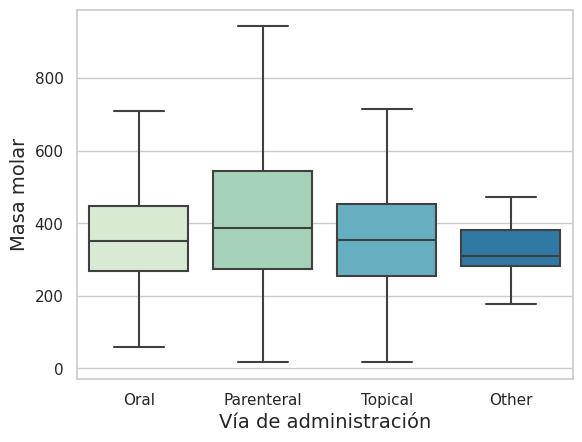

In [60]:
#Graficar boxplot sin outliers
ax = sns.boxplot(x="Via_admon", y="MW", data=df, palette="GnBu", showfliers=False)
plt.xlabel('Vía de administración', size=14)
plt.ylabel('Masa molar', size=14)

Más paletas de colores para `seaborn`: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

Veamos *boxplots* conjuntos para todas las variables:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


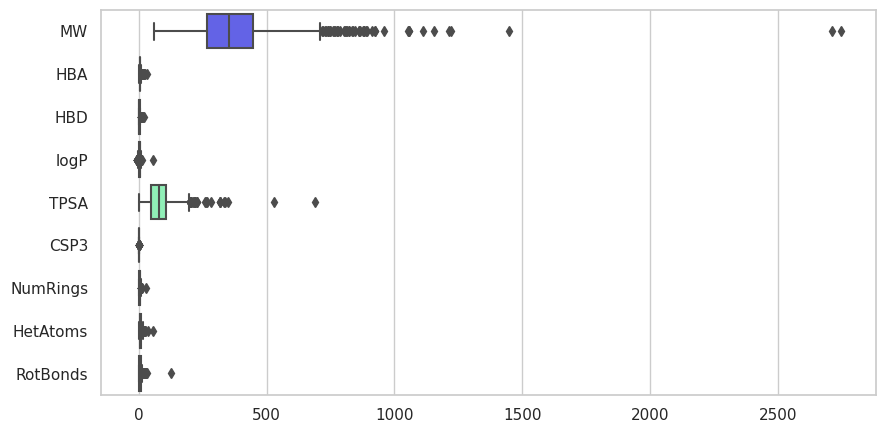

In [61]:
#Seleccionamos sólo las columnas de descriptores de los fármacos de administración oral
df_oral = df[df['oral']== 1]
df_oral_descriptors= df_oral[['MW', 'HBA', 'HBD', 'logP', 'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds']]
#Graficamos boxplots para todas las variables:
ax = sns.boxplot(data=df_oral_descriptors, orient="h", palette="rainbow")
#Especificamos tamaño de la figura con Matplotlib:
plt.gcf().set_size_inches(10, 5)
plt.show()

Como podemos ver, los valores de las variabes están en escalas diferentes. Para visualizarlo mejor, apliquemos escala logarítmica:


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


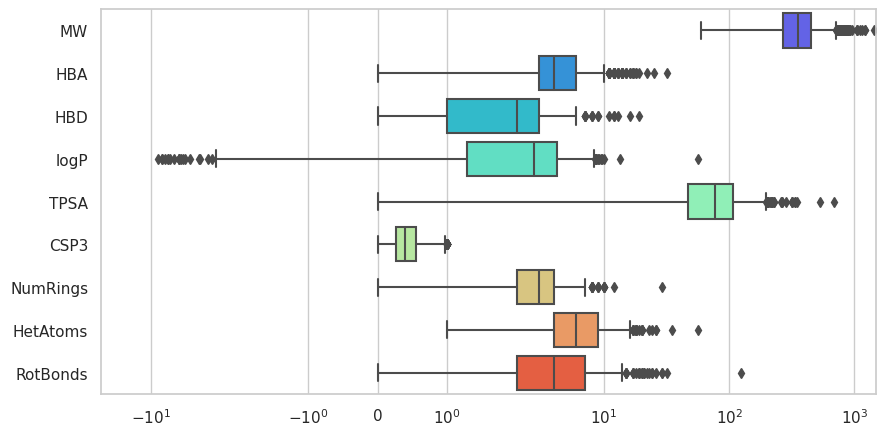

In [62]:
#Vuelvo a graficar los boxplots:
ax = sns.boxplot(data=df_oral_descriptors, orient="h", palette="rainbow")
#Eje x en escala logarítmica:
ax.set_xscale('symlog')
#Especifico desde dónde hasta dónde quiero que me grafique el eje x:
ax.axis(xmin=-25, xmax=1500)
#Tamaño de la figura:
plt.gcf().set_size_inches(10, 5)

Como podemos ver, las medias de los datos varían mucho. Esto ocurre porque los datos están en diferentes escalas, lo que significa que se utilizan diferentes unidades para medir las diferentes características. Para  **normalizar o escalar los datos**, existen varios procedimientos descritos (ver en [*Scaling of Data*](http://www.statistics4u.com/fundstat_eng/cc_scaling.html)). Un método común es estandarizar las variables restando la media de la columna y dividiéndola por la varianza, haciendo esto nos quedan nuevos valores dentro de cada columna para los cuales $\mu=0$ y $\sigma=1$ . `Scikit-learn` tiene un módulo para esto llamado "preprocessing", que usaremos a continuación. Para más información sobre esto, revisar la [documentación de Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')


Para el proceso de normalización, es necesario eliminar las columnas de tipo *string*.

In [63]:
#Verificar que las variables sean numéricas
df_oral_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1676
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MW        1103 non-null   float64
 1   HBA       1103 non-null   int64  
 2   HBD       1103 non-null   int64  
 3   logP      1103 non-null   float64
 4   TPSA      1103 non-null   float64
 5   CSP3      1103 non-null   float64
 6   NumRings  1103 non-null   int64  
 7   HetAtoms  1103 non-null   int64  
 8   RotBonds  1103 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 86.2 KB


**Paquetería y funciones a instalar**

`Standard scaler`: Elimina la media y escala cada caracteristica/variable a la varianza de la unidad, se realiza por caracteristicas de forma independiente.
Para saber más: [*Standar scaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


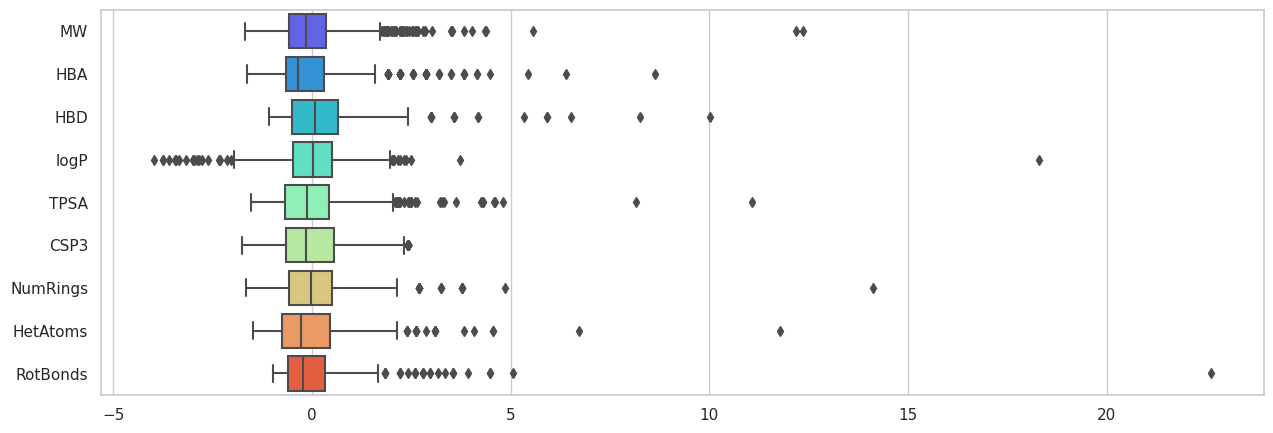

In [64]:
#Importo la función StandardScaler de la librería ScikitLearn
from sklearn.preprocessing import StandardScaler

#Hago un nuevo objeto con los datos normalizados:
scaled = StandardScaler().fit_transform(df_oral_descriptors)  #El método fit.transform() ajusta estos nuevos valores a los datos y los almacena,
                                                              #reemplazando los valores anteriores.

#Hago un nuevo dataframe normalizado, lo llamo "df_scaled":
df_scaled = pd.DataFrame(data=scaled, columns=df_oral_descriptors.columns)

#Grafico boxplots de las variables de ese nuevo dataframe (con Seaborn):
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

#Tamaño de  la figura del gráfico de Seaborn (con Matplotlib)
plt.gcf().set_size_inches(15, 5)

Documentación de *boxplots* con `seaborn`: https://seaborn.pydata.org/generated/seaborn.boxplot.html

##Diagramas de violín
Los *violin plots* pueden usarse para visualizar la información contenida en un *boxplot*, es decir, la media, los cuartiles, y los valores máximo y mínimo, agregando además la información de la distribución de los datos (**Figura 2**).

**Figura 2.** Diferentes elementos que componen un *violinplot* <br>
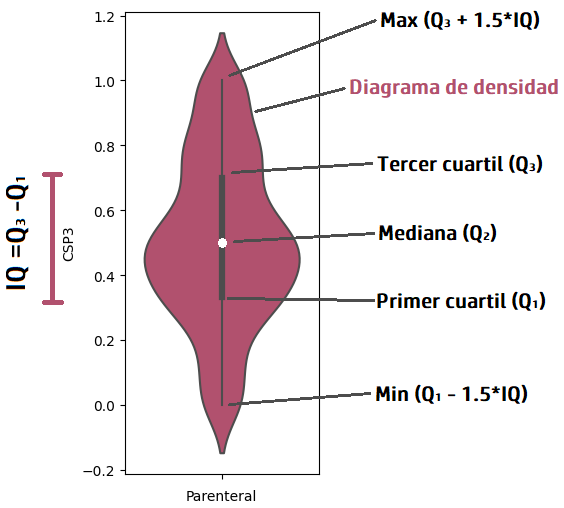

<Axes: ylabel='TPSA'>

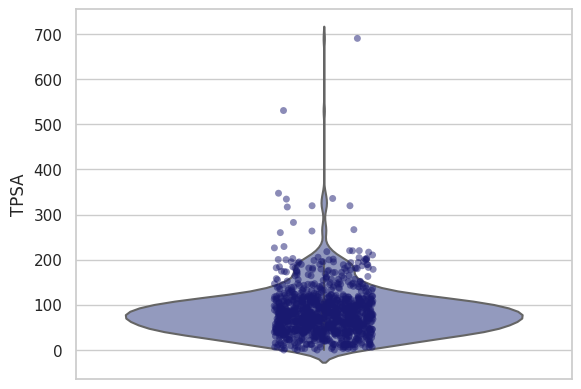

In [65]:
#Graficar violinplot con el área de superficie polar topológica de los fármacos orales
sns.violinplot(y="TPSA", data=df_oral_descriptors, palette="BuPu")
#Agregar puntos para cada dato
sns.stripplot(y="TPSA", data=df_oral_descriptors, color='midnightblue', alpha=0.5)

<Axes: xlabel='Via_admon', ylabel='CSP3'>

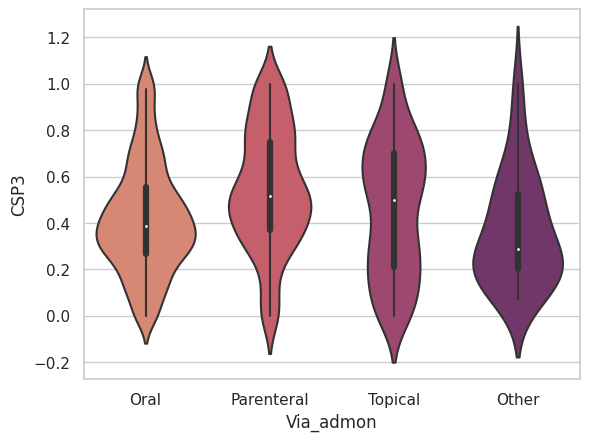

In [66]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Via_admon", y="CSP3", data=df, palette="flare")

También podemos utilizar los gráficos de violín para comparar dos descriptores entre sí y visualizar una posible correlación entre ambos. Por ejemplo, al graficar el número de anillos vs. la masa molar exacta podemos observar que cuando uno aumenta el otro también (directamente proporcionales):

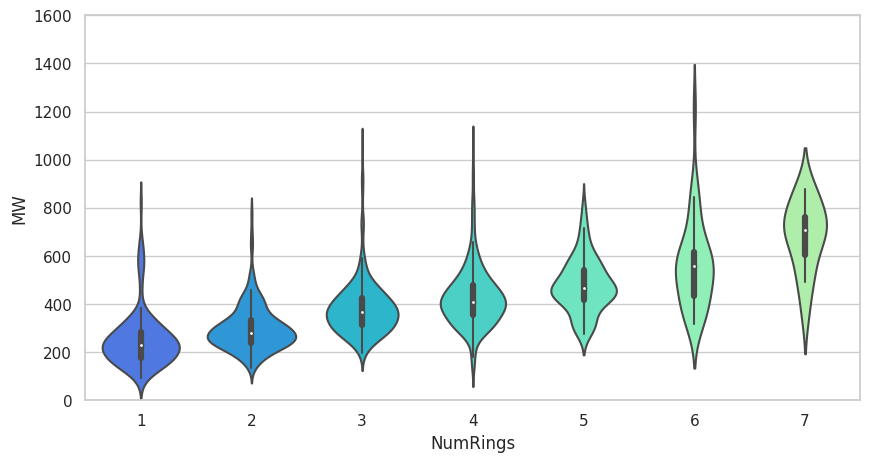

In [67]:
#Violinplot del número de anillos vs. masa molar de los fármacos orales
ax = sns.violinplot(x = 'NumRings', y = 'MW', data = df_oral_descriptors, palette="rainbow")
#Establecer límites para ambos ejes
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 1600)
#Tamaño de gráfico
plt.gcf().set_size_inches(10, 5)

Documentación de *violinplots* con `seaborn`: https://seaborn.pydata.org/generated/seaborn.violinplot.html

#Análisis de Correlación
---

Otro aspecto importante para entender nuestros datos es estudiar la correlación entre las variables. Si queremos, por ejemplo, observar la correlación entre logP y TPSA, podemos hacer este gráfico de dispersión con histogramas marginales usando "`sns.jointplot`"


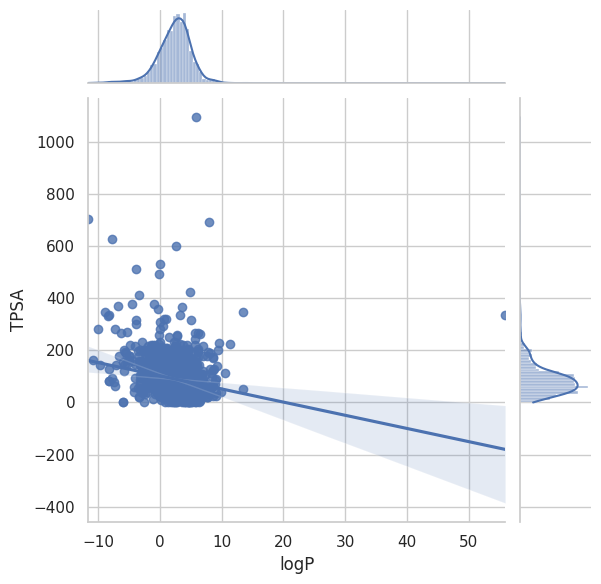

In [68]:
joint_plt = sns.jointplot(x='logP', y='TPSA', data=df, kind='reg')


Se observa una pendiente no muy pronunciada, se infiere que la relación no es exactamente lineal y se tenga una correlación baja.

##Pair Plot

Otra forma de visualizar la correlación entre las variables
es trazar una matriz de correlación con la función `pairplot` de Seaborn. Por ejemplo, acá trazamos la correlación de seis de las columnas del dataset: "logP", "TPSA", "MW", "RotBonds", "HBD" y "HBA".


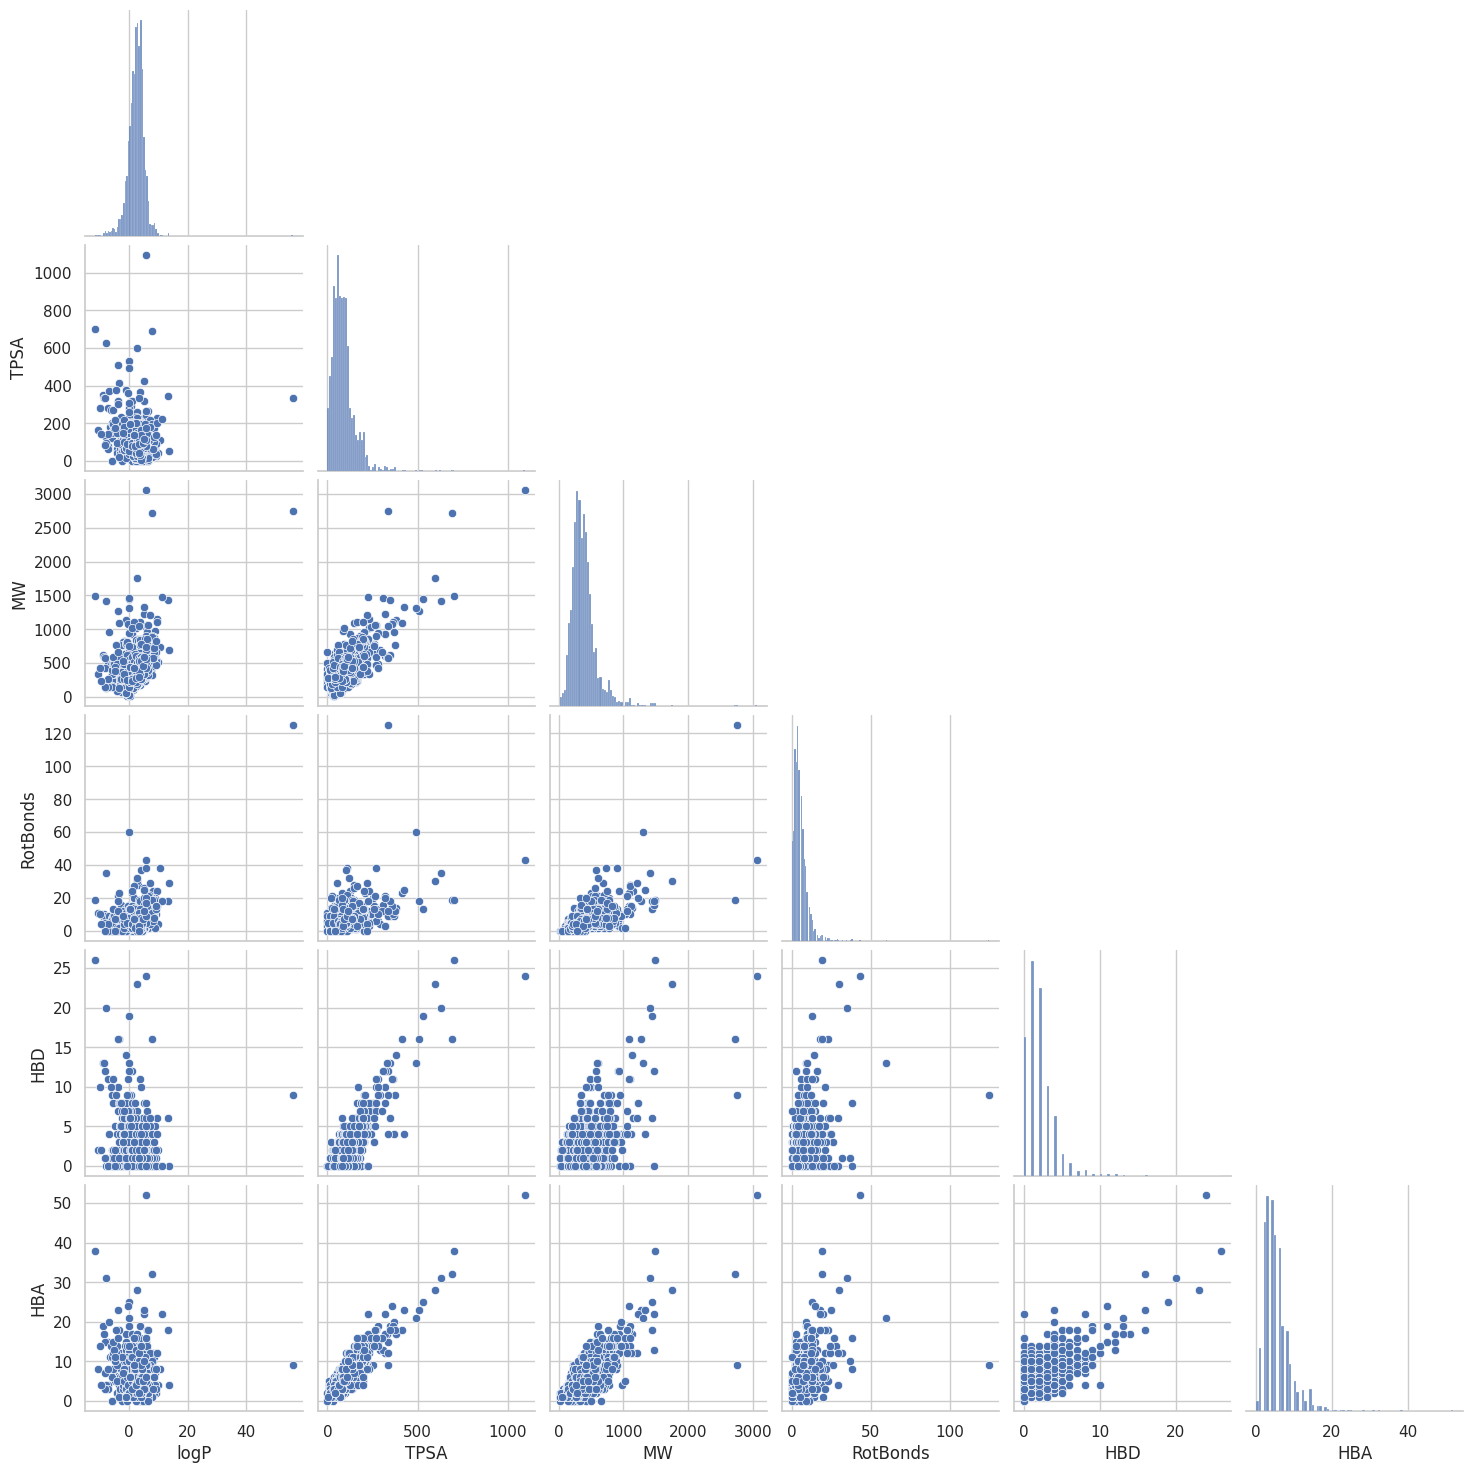

In [69]:
sns.pairplot(df[["logP", "TPSA", "MW", "RotBonds", "HBD", "HBA"]], corner="true")
#corner=True omite la representación de la mitad superior de la matriz

##Coeficiente de Correlación de Pearson
 Podemos calcular la correlación entre dos variables con el coeficiente de correlación _Pearson_ y el _valor p_.

El _coeficiente de correlación de Pearson_ (r) nos permite observar fácilmente las dependencias lineales entre dos conjuntos de datos.
* Un valor de +1 significa correlación lineal positiva total,
* 0 significa que no hay correlación lineal, y
* -1, correlación lineal negativa total.

Las correlaciones positivas implican que a medida que *x* aumenta, también lo hace *y*. Las correlaciones negativas implican que a medida que *x* aumenta, *y* disminuye.

El _valor p_ indica aproximadamente la probabilidad de que los conjuntos de datos no correlacionados tengan un coeficiente de correlación _Pearson_ al menos tan extremo como el determinado para esos conjuntos de datos. Si esta probabilidad es inferior al 5% (P<0,05), significa que el coeficiente de correlación es estadísticamente significativo.

**Hay que tener cuidado porque la correlación no implica causalidad. Cuando dos variables están correlacionadas, puede haber o no una conexión causal, y esta conexión puede ser además indirecta.**



In [70]:
#Importar la  función PearsonR del módulo "stats" de la librería SciPy
from scipy.stats import pearsonr
#Definir una función para obtener la correlación entre dos variables
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("La correlación entre {} y {} es {:.2f}".format(col1, col2, pearson_corr))
    print("El valor-P de esta correlación es {:.^e}".format(p_value))
#Usamos la función para obtener la correlación entre logP y TPSA
get_corr('logP', 'TPSA', df)

La correlación entre logP y TPSA es -0.21
El valor-P de esta correlación es 8.820805e-19


Hay una correlación negativa entre logP y TPSA ( r = -0.21 ), siendo esta significativa al obtener un valor de p inferior al 5%.
También significa que a medida que *x* aumenta, *y* disminuye. Sin embargo, la correlación no es alta al no acercarse a -1.

##Mapa de calor (*heat map*)

Los  mapas de calor o *heat maps* son representaciones gráficas que nos permiten observar la correlación entre variables (descriptores) evitando así ruido e información redundante.


Podemos crear un DataFrame con el coeficiente de correlación de Pearson para cada par de columnas (usando la función `df.corr()`) y luego, usar `Matplotlib` y `Seaborn` para crear un _heatmap_ de los coeficientes.


<Axes: >

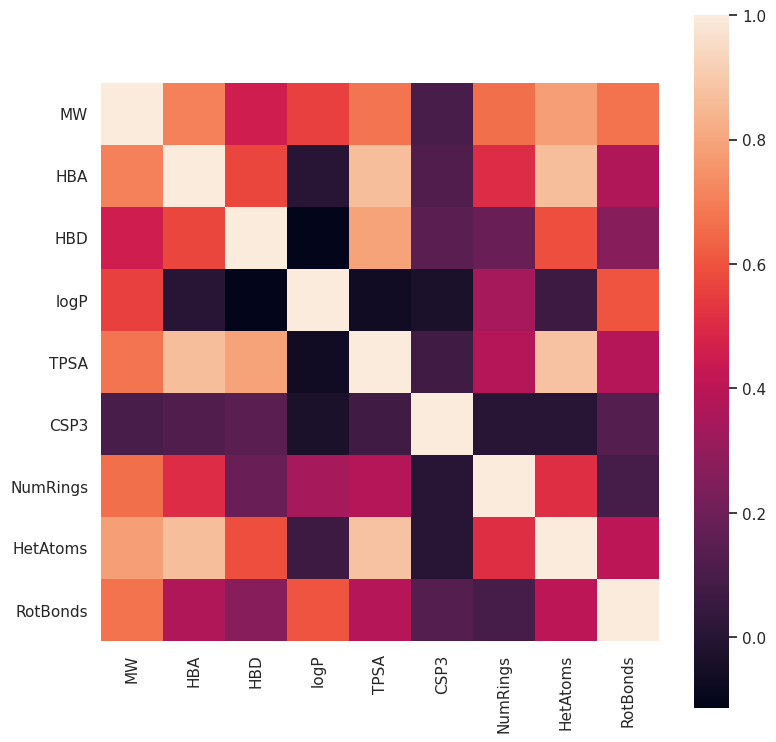

In [71]:
# Calculamos la correlación con el coeficiente de Pearson usando Pandas:
correlation = df_oral_descriptors.corr(method='pearson')
# Creamos una nueva figura con Matplotlib y definimos el tamaño:
fig=plt.gcf()
fig.set_size_inches(9,9)
# Heatmap de correlación usando Seaborn:
sns.heatmap(correlation, annot=False,square=True)

 Cuando se comparan varias variables al mismo tiempo es difícil comprender cómo se comportan los datos. Así que podríamos añadir al *heatmap* los coeficientes de cada comparación y trazar sólo la matriz de correlación triangular inferior (ya que es un gráfico simétrico, y la información del triángulo superior es redundante).


<Axes: >

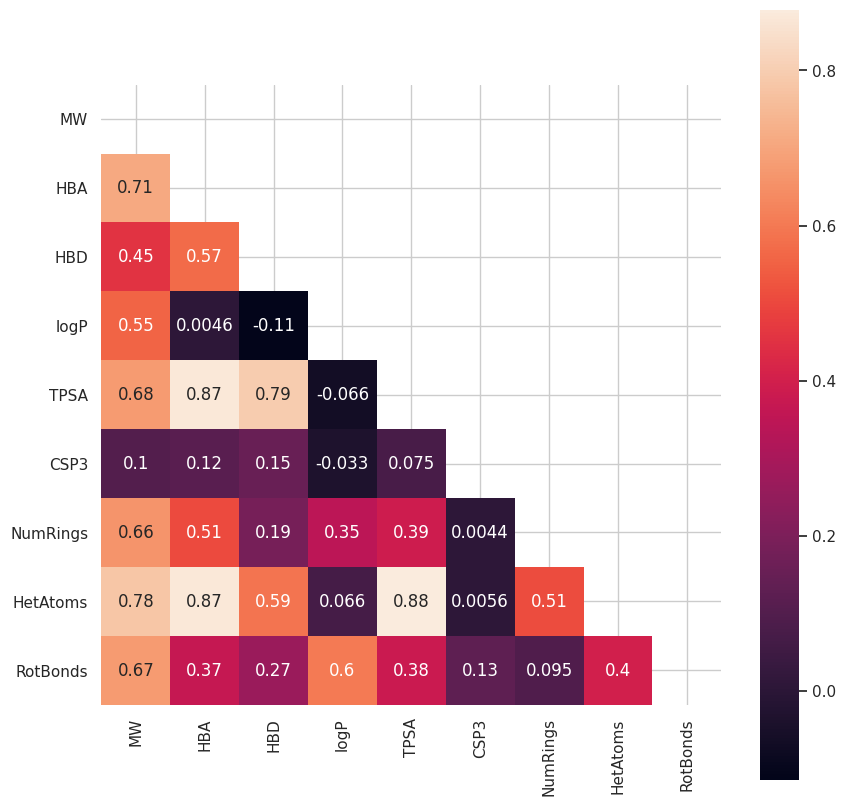

In [72]:
#Calcular correlación
correlation = df_oral_descriptors.corr()
# np.triu es una función de Numpy que proporciona el triángulo superior de una matriz cuadrada
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

#Análisis de núcleos base o *scaffolds*

En esta sección visualizaremos los *scaffolds* o *frameworks* de las moléculas presentes en la base de datos y calcularemos su frecuencia. Utilizaremos la definición de [Bemis y Murcko](https://pubs.acs.org/doi/10.1021/jm9602928), la cual remueve las cadenas laterales de la estructura original manteniendo los anillos y los *linkers*:

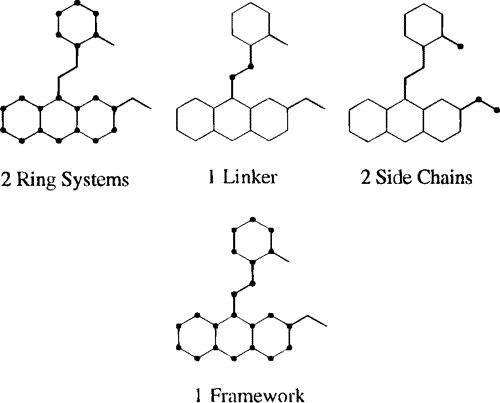

Nueva columna con los *scaffolds* de Bemis/Murcko:

In [73]:
#Añadir nueva columna y visualizar SMILES
PandasTools.AddMurckoToFrame(df, "ROMol")
df[['canonical_smiles', 'Murcko_SMILES']]

,canonical_smiles,Murcko_SMILES
0,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,O=C(c1ccco1)N1CCN(c2ncc3ccccc3n2)CC1
1,CN1CCC[C@H]1c1cccnc1,c1cncc([C@@H]2CCCN2)c1
2,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,O=c1ccn2c3c(c(N4CCNCC4)ccc13)OCC2
3,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,O=c1cc[nH]c2ncccc12
4,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,O=C(c1ccccc1)n1ccc2ccccc21
...,...,...
1672,Cc1ccc(C(=O)OCc2ccc([C@@H](CN)C(=O)Nc3ccc4cncc...,O=C(Cc1ccc(COC(=O)c2ccccc2)cc1)Nc1ccc2cnccc2c1
1673,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...,c1ccc2c(c1)CC[C@@H]1[C@@H]2CCC2CCC[C@H]21
1674,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...,O=C(Nc1cccc(C(NCC2CC2)c2ccccc2)c1)c1ccnn1-c1cc...
1675,CNC(=O)c1nnc(NC(=O)C2CC2)cc1Nc1cccc(-c2ncn(C)n...,O=C(Nc1cc(Nc2cccc(-c3nc[nH]n3)c2)cnn1)C1CC1


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,...,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,Via_admon,Murcko_SMILES,scaffold
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,...,1,1.7846,106.95,0.315789,4,9,4,Oral,O=C(c1ccco1)N1CCN(c2ncc3ccccc3n2)CC1,

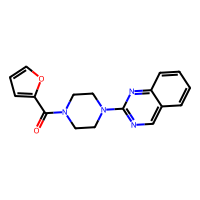

In [74]:
#Añadir una columna con los scaffolds en tipo Mol
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')
df.head(1)

In [75]:
#Hacer una copia del dataframe con el que estamos trabajando
df_b= df.copy()
#Eliminar columnas tipo Mol
df_b.drop("ROMol", axis=1, inplace=True)
df_b.drop("scaffold", axis=1, inplace=True)
#Conservar columnas seleccionadas
df_b = df_b[['canonical_smiles','Murcko_SMILES', 'MW','HBD','HBA','TPSA','RotBonds',
             'logP', 'CSP3','HetAtoms', 'NumRings', 'Via_admon']]

In [76]:
#Visualizar copia del dataframe
print(f"DataFrame shape: {df_b.shape}")
df_b.head(2)

DataFrame shape: (1677, 12)


,canonical_smiles,Murcko_SMILES,MW,HBD,HBA,TPSA,RotBonds,logP,CSP3,HetAtoms,NumRings,Via_admon
0,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,O=C(c1ccco1)N1CCN(c2ncc3ccccc3n2)CC1,383.159354,1,8,106.95,4,1.7846,0.315789,9,4,Oral
1,CN1CCC[C@H]1c1cccnc1,c1cncc([C@@H]2CCCN2)c1,162.115698,0,2,16.13,1,1.8483,0.500000,2,2,Oral


In [77]:
#Agrupar datos por scaffold y contarlos
amount = df_b.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:",amount.sort_values(ascending=False))
#Nuevo dataframe con SMILES de scaffolds y su conteo, ordenados de mayor a menor
df_sca_all = pd.DataFrame (amount, columns = ['Amount'] )
df_sca_all=df_sca_all.sort_values(by='Amount', ascending= False)
df_sca_all=df_sca_all.reset_index(level=None, drop=False)
print ('All:', df_sca_all.shape, df_sca_all.columns)
df_sca_all

Dataset with 1009 different entries: Murcko_SMILES
c1ccccc1                                       142
                                               120
O=C1C=C2CC[C@H]3[C@@H]4CCCC4CC[C@@H]3C2CC1      20
O=C1C=CC2C(=C1)CC[C@@H]1C2CCC2CCC[C@H]21        18
c1ccc(Cc2ccccc2)cc1                             13
                                              ... 
O=C(O[C@H]1c2nccnc2C(=O)N1c1ccccn1)N1CCNCC1      1
O=C(Oc1ccccc1)c1ccccc1                           1
O=C(Oc1ccccc1OC(=O)c1ccccc1)c1ccccc1             1
O=C(c1cc2ccccc2[nH]1)N1CCN(c2ccccn2)CC1          1
c1nsnc1N1CCOCC1                                  1
Length: 1009, dtype: int64
All: (1009, 2) Index(['Murcko_SMILES', 'Amount'], dtype='object')


,Murcko_SMILES,Amount
0,c1ccccc1,142
1,,120
2,O=C1C=C2CC[C@H]3[C@@H]4CCCC4CC[C@@H]3C2CC1,20
3,O=C1C=CC2C(=C1)CC[C@@H]1C2CCC2CCC[C@H]21,18
4,c1ccc(Cc2ccccc2)cc1,13
...,...,...
1004,O=C(O[C@H]1c2nccnc2C(=O)N1c1ccccn1)N1CCNCC1,1
1005,O=C(Oc1ccccc1)c1ccccc1,1
1006,O=C(Oc1ccccc1OC(=O)c1ccccc1)c1ccccc1,1
1007,O=C(c1cc2ccccc2[nH]1)N1CCN(c2ccccn2)CC1,1


In [78]:
#El dataframe cuenta con moléculas sin scaffold (moléculas lineales con fila vacía), anotamos en la línea la leyenda "Linear molecule":
df_sca_all.at[1, 'Murcko_SMILES']='Linear molecule'

In [79]:
#Añadir columna de frecuencia, considerar el número total de registros para el cálculo.
df_sca_all.reset_index(drop=True, inplace=True)
df_sca_all["Frecuency"] = (df_sca_all['Amount'] / 1677)*100
print(f"Total Frecuency in Database: {sum(df_sca_all['Frecuency'])}, different entries:{sum(df_sca_all['Amount'])}, different Murcko Smiles:",
      len(df_sca_all['Murcko_SMILES']) )
df_sca_all = df_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]
df_sca_all

Total Frecuency in Database: 99.99999999999848, different entries:1677, different Murcko Smiles: 1009


,Murcko_SMILES,Amount,Frecuency
0,c1ccccc1,142,8.467501
1,Linear molecule,120,7.155635
2,O=C1C=C2CC[C@H]3[C@@H]4CCCC4CC[C@@H]3C2CC1,20,1.192606
3,O=C1C=CC2C(=C1)CC[C@@H]1C2CCC2CCC[C@H]21,18,1.073345
4,c1ccc(Cc2ccccc2)cc1,13,0.775194
...,...,...,...
1004,O=C(O[C@H]1c2nccnc2C(=O)N1c1ccccn1)N1CCNCC1,1,0.059630
1005,O=C(Oc1ccccc1)c1ccccc1,1,0.059630
1006,O=C(Oc1ccccc1OC(=O)c1ccccc1)c1ccccc1,1,0.059630
1007,O=C(c1cc2ccccc2[nH]1)N1CCN(c2ccccn2)CC1,1,0.059630


[04:39:19] SMILES Parse Error: syntax error while parsing: Linear
[04:39:19] SMILES Parse Error: Failed parsing SMILES 'Linear' for input: 'Linear'


,Murcko_SMILES,Amount,Frecuency,ROMol
0,c1ccccc1,142,8.467501,

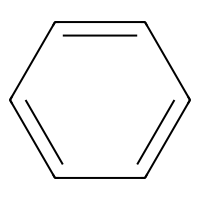

In [80]:
#Añadir columna tipo Mol al dataframe con frecuencias de scaffolds
PandasTools.AddMoleculeColumnToFrame(df_sca_all, smilesCol='Murcko_SMILES')
df_sca_all[0:1]

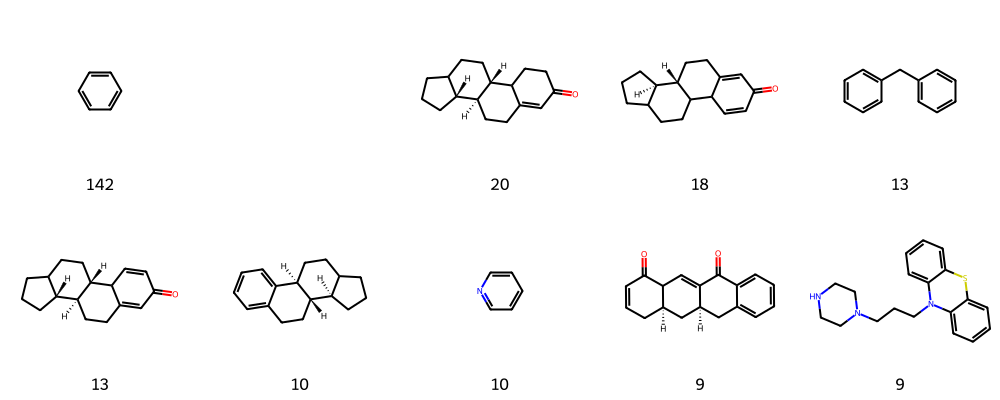

In [81]:
#Visualizar scaffolds con su conteo
PandasTools.FrameToGridImage(df_sca_all[0:10], column='ROMol', legendsCol='Amount', molsPerRow=5)

#Concatenar bases de datos

Abriremos un [archivo .csv](https://github.com/DIFACQUIM/Cursos/blob/main/Datasets/DNMT1_curada.csv) que será un nuevo *dataframe* llamado "DNMT1". Este archivo contiene datos de compuestos con concentración inhibitoria 50 (IC50) reportada en ChEMBL:

In [82]:
#Para cargar el archivo desde GitHub:
DNMT1=pd.read_csv("https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/DNMT1_curada.csv", delimiter=',')
#Obtener información sobre el número de filas y columnas de la base de datos
print(f"DataFrame shape: {DNMT1.shape}.")
DNMT1.head(1)

DataFrame shape: (391, 3).


,ID,SMILES,Data set
0,"""CHEMBL2336409",Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...,DNMT1


Imprimir columnas y unificar nombres:



In [83]:
#Ver columnas
print(df.columns)
print(DNMT1.columns)

Index(['molecule_chembl_id', 'pref_name', 'canonical_smiles', 'molecule_type',
       'max_phase', 'oral', 'parenteral', 'topical', 'first_approval',
       'indication_class', 'NEW_SMILES', 'ROMol', 'MW', 'HBA', 'HBD', 'logP',
       'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds', 'Via_admon',
       'Murcko_SMILES', 'scaffold'],
      dtype='object')
Index(['ID', 'SMILES', 'Data set'], dtype='object')


In [84]:
#Nueva columna para especificar base de datos
df['DATASET'] = 'CHEMBL'

In [85]:
# Seleccionar columnas
df = df[['molecule_chembl_id', 'NEW_SMILES', 'DATASET']]
DNMT1 = DNMT1[['ID', 'SMILES', 'Data set']]

# Cambiar nombre a columnas
df.columns = ["ID", "SMILES", "DATABASE_NAME"]
DNMT1.columns = ["ID", "SMILES", "DATABASE_NAME"]

# Unir (concatenar) bases de datos
DATA = pd.concat([df, DNMT1], axis=0).reset_index(drop=True)
DATA.head()

,ID,SMILES,DATABASE_NAME
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL
3,CHEMBL5,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,CHEMBL
4,CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,CHEMBL


## *Quantitative Estimate of Drug-Likeness*

El QED es una medida para estimar las cualidades tipo fármaco de un compuesto. Está basado en ocho propiedades con relevancia farmacéutica: masa molar, coeficiente de partición, aceptores y donadores de puente de hidrógeno, área polar superficial, enlaces rotables, anillos aromáticos, y el número de alertas por grupos funcionales. El punto de corte que suele usarse es QED > 0.67. <br>
Referencia: https://doi.org/10.1038/nchem.1243

In [86]:
#Añadimos la columna tipo Mol a la base de datos completa
PandasTools.AddMoleculeColumnToFrame(DATA,'SMILES','Molecule',includeFingerprints=True)
print([str(x) for x in  DATA.columns])

['ID', 'SMILES', 'DATABASE_NAME', 'Molecule']


,ID,SMILES,DATABASE_NAME,Molecule
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL,

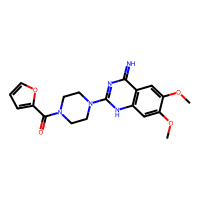
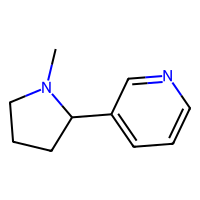
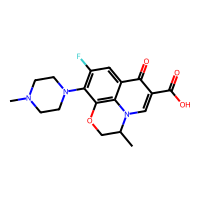

In [87]:
#Visualizamos las primeras líneas del nuevo DataFrame
DATA.head(3)

,ID,SMILES,DATABASE_NAME,Molecule,QED
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,,0.708798
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,,0.626152
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL,,0.874740

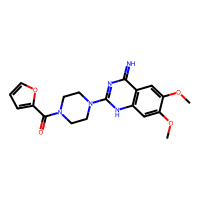
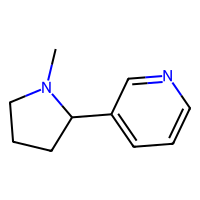
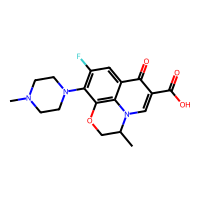

In [88]:
#Calculamos el QED
QEDlist = []

for mol in DATA['Molecule']:
    QED = Chem.QED.qed(mol)
    QEDlist.append(QED)
DATA['QED']=QEDlist
DATA.head(3)

Text(0, 0.5, 'QED')

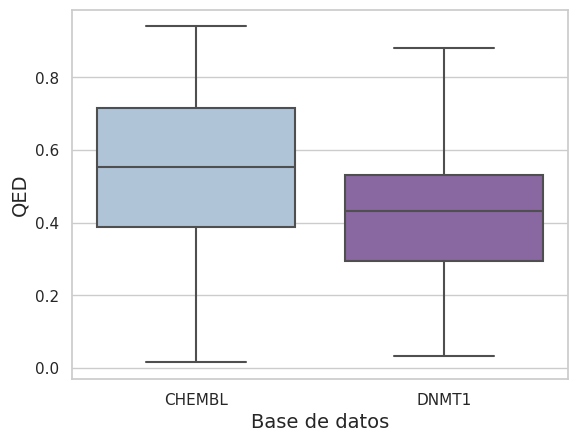

In [89]:
#Graficar boxplot
ax = sns.boxplot(x="DATABASE_NAME", y="QED", data=DATA, palette="BuPu")
#Título de ejes
plt.xlabel('Base de datos', size=14)
plt.ylabel('QED', size=14)

## *Synthetic Accessibility Score*

El SAscore asigna un número entre 1 (fácil de obtener) y 10 (muy difícil de obtener) a un compuesto para estimar su accesibilidad sintética. Está basado en una combinación de contribuciones de fragmentos y una penalización por complejidad. El punto de corte suele establecerse en SAscore menor o igual a 6. <br>
Referencia: https://doi.org/10.1186/1758-2946-1-8

In [90]:
#Importar módulos necesarios:
import os
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

,ID,SMILES,DATABASE_NAME,Molecule,QED,SA
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,,0.708798,2.665971
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,,0.626152,2.499926
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL,,0.874740,3.097642

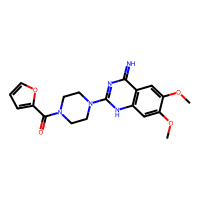
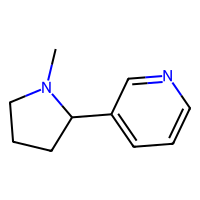
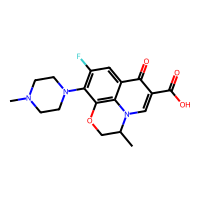

In [91]:
#Calcular SAscore
SAlist = []

for mol in DATA['Molecule']:
    SA = sascorer.calculateScore(mol)
    SAlist.append(SA)
DATA['SA']=SAlist
DATA.head(3)

Text(0, 0.5, 'SAscore')

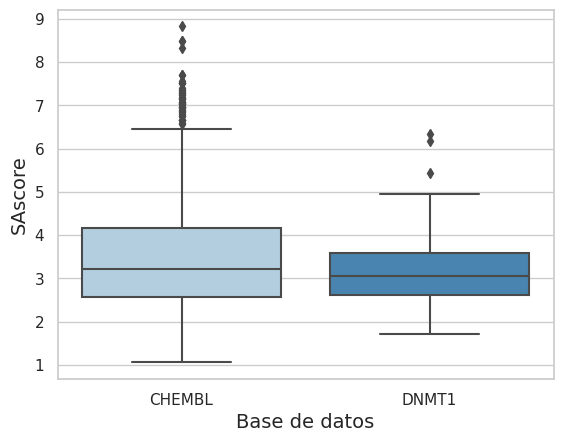

In [92]:
#Graficar boxplot
ax = sns.boxplot(x="DATABASE_NAME", y="SA", data=DATA, palette="Blues")
#Título de ejes
plt.xlabel('Base de datos', size=14)
plt.ylabel('SAscore', size=14)

In [93]:
#Eliminar molecula tipo Mol y guardar el archivo en formato .csv
DATA.drop("Molecule", axis=1, inplace=True)
DATA.to_csv("DATA.csv", index=False)

## *Raincloud plots*

Los *raincloud plots* o gráficos de nube combinan la visualización de la distribución (la "nube") y la dispersión de los datos (la "lluvia"). Los gráficos de nube combinan la mitad de un diagrama de violín, la distribución de los datos representados con puntos aleatorios (*jitter*) y una visualización de tendencia central como los diagramas de caja. <br>
El siguiente código está basado en lo publicado en: https://wellcomeopenresearch.org/articles/4-63

In [94]:
pip -V

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [95]:
#Instalar librería para raincloud plots, reiniciar el sistema si al final de la celda aparece la advertencia
!pip install ptitprince

In [96]:
#Importar librerías necesarias después de reiniciar el sistema
import pandas as pd
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid") #Estilo predeterminado de las gráficas
import matplotlib.collections as clt

In [97]:
DATA = pd.read_csv("https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/DATA.csv", delimiter=",")
DATA.head(2)

,ID,SMILES,DATABASE_NAME,QED,SA
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,0.708798,2.665971
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,0.626152,2.499926


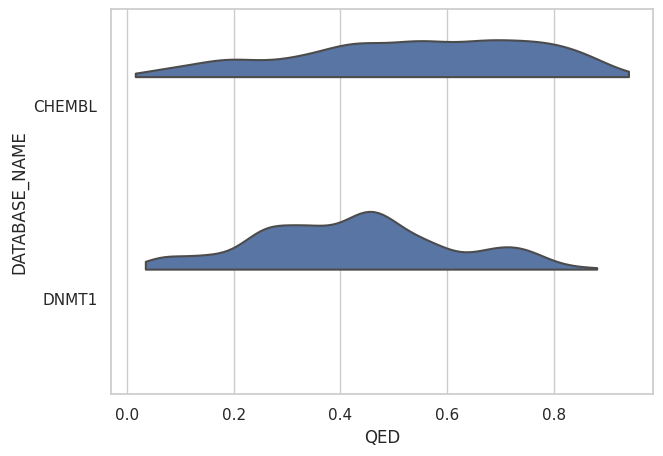

In [98]:
#Graficar las "nubes"
f, ax = plt.subplots(figsize=(7, 5))
dy="DATABASE_NAME"; dx="QED"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = DATA, palette = pal,
      bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
      orient = ort)

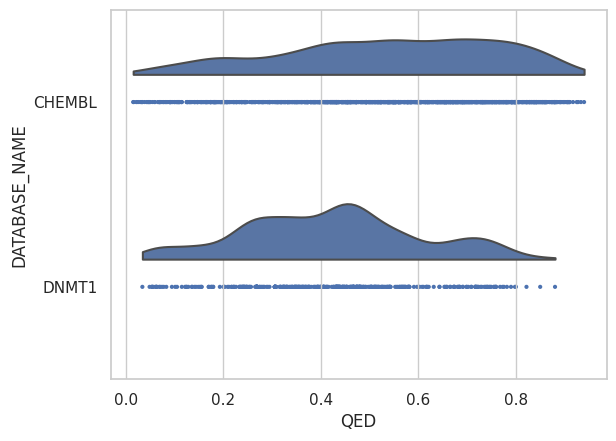

In [99]:
#Agregar la "lluvia"
ax=pt.half_violinplot( x = dx, y = dy, data = DATA, palette = pal,
      bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
      orient = ort)

ax=sns.stripplot( x = dx, y = dy, data = DATA, palette = pal,
     edgecolor = "white",size = 3, jitter = 0, zorder = 0,
     orient = ort)

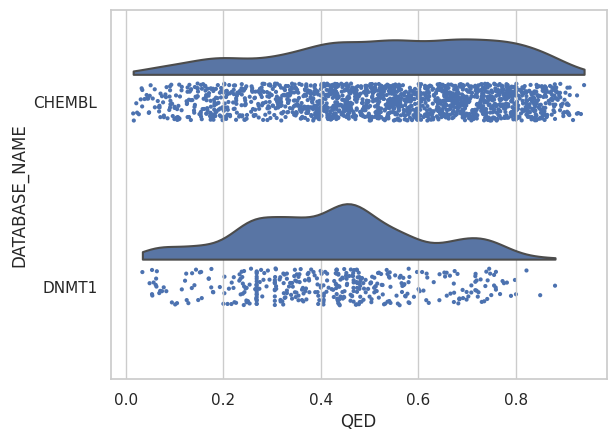

In [100]:
#"Dispersar la lluvia"
ax=pt.half_violinplot( x = dx, y = dy, data = DATA, palette = pal,
      bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
      orient = ort)

ax=sns.stripplot( x = dx, y = dy, data = DATA, palette = pal,
     edgecolor = "white",size = 3, jitter = 1, zorder = 0,
     orient = ort)

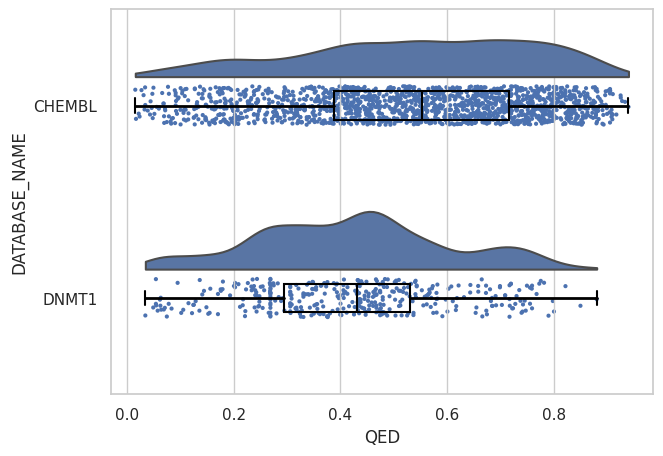

In [101]:
#Agregar un diagrama de caja para mostrar los cuartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = DATA, palette = pal,
       bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
       orient = ort)

ax=sns.stripplot( x = dx, y = dy, data = DATA, palette = pal,
       edgecolor = "white", size = 3, jitter = 1, zorder = 0,
       orient = ort)

ax=sns.boxplot( x = dx, y = dy, data = DATA, color = "black",
       width = .15, zorder = 10, showcaps = True,
       boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
       whiskerprops = {'linewidth':2, "zorder":10},
       saturation = 1, orient = ort)

[Text(0, 0.5, 'QED')]

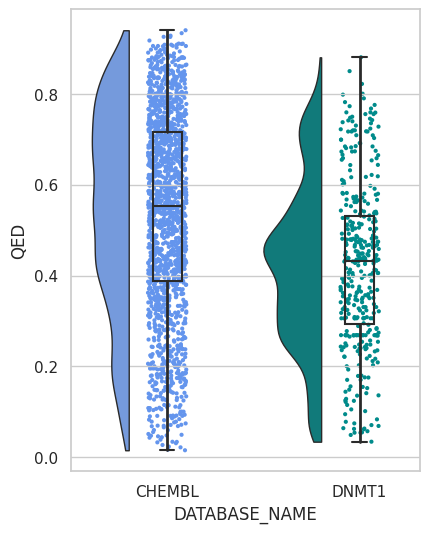

In [102]:
#Con menos líneas de código:
palette= "cornflowerblue", "#008B8B"

dx = "DATABASE_NAME"; dy = "QED"; ort = "v"; pal = palette; sigma = .2
f, ax = plt.subplots(figsize=(4.5, 6))

ax=pt.RainCloud(x = dx, y = dy, data = DATA, palette = pal,
      bw = sigma,width_viol = .6, ax = ax, orient = ort)

ax.set(ylabel='QED')

[Text(0.5, 0, 'Base de datos')]

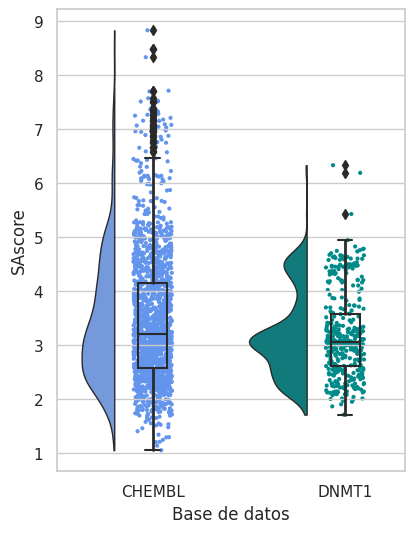

In [103]:
#Para SAscore
palette= "cornflowerblue", "#008B8B"

dx = "DATABASE_NAME"; dy = "SA"; ort = "v"; pal = palette; sigma = .2
f, ax = plt.subplots(figsize=(4.5, 6))

ax=pt.RainCloud(x = dx, y = dy, data = DATA, palette = pal,
      bw = sigma,width_viol = .6, ax = ax, orient = ort)

ax.set(ylabel='SAscore')
ax.set(xlabel='Base de datos')

#Para saber maś:

[*Practical chemoinformatics*](http://practicalcheminformatics.blogspot.com/)

[*Practical chemoinformatics - EDA*](http://practicalcheminformatics.blogspot.com/2021/10/exploratory-data-analysis-with.html)

[*Visualization of chemical datasets and EDA*](https://insilico-notebook.com/en/chemdata-eda/)

[*Python guides*](https://www.statology.org/python-guides/)

[Representaciones gráficas en python](http://research.iac.es/sieinvens/python-course/matplotlib.html)

[*Violinplots*](https://datagy.io/seaborn-violinplot/)



[*Progress on open chemoinformatic tools for expanding and exploring the chemical space*](https://link.springer.com/article/10.1007/s10822-021-00399-1)

[Bases de datos desde python](https://www.tutorialesprogramacionya.com/pythonya/detalleconcepto.php?punto=81&codigo=81&inicio=75) <br>
[Relaciones cuantitativas estructura-propiedad (*QSPR*)](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/05%3A_5._Quantitative_Structure_Property_Relationships/5.05%3A_Python_Assignment)